In [11]:
from linares_plot import *
import statsmodels.formula.api as smf


In [12]:
data = pd.read_csv('C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\idibaps_psychophysics_rt')

In [13]:
df_controls = data.loc[data['type']==0]
df_controls.head()

,Unnamed: 0,r_T,r_NT,delay,type,A_T,A_NT,A_err,r_err,A_R,r_R,RT,subject,session,Int_A_err,Int_r_err
0,0,13.68,NaN,0.0,0.0,314.0,NaN,-1.90,1.81,315.90,11.87,0.0,1,1,NaN,NaN
2,2,10.70,NaN,3.0,0.0,50.0,NaN,6.38,2.97,43.62,7.73,0.0,1,1,NaN,NaN
5,5,13.68,NaN,0.0,0.0,129.0,NaN,-10.73,0.62,139.73,13.06,0.0,1,1,NaN,NaN
6,6,13.68,NaN,3.0,0.0,304.0,NaN,4.01,0.96,299.99,12.72,0.0,1,1,NaN,NaN
7,7,13.68,NaN,3.0,0.0,215.0,NaN,-1.36,-1.49,216.36,15.17,0.0,1,1,NaN,NaN


In [14]:
df_controls.columns

Index(['Unnamed: 0', 'r_T', 'r_NT', 'delay', 'type', 'A_T', 'A_NT', 'A_err',
       'r_err', 'A_R', 'r_R', 'RT', 'subject', 'session', 'Int_A_err',
       'Int_r_err'],
      dtype='object')

In [ ]:
c_d0='grey'
c_d3 = '#91cf60'
df_controls['delay_n']=df_controls['delay'].copy()
df_controls['delay_n']=df_controls['delay_n'].replace([0,3], ['delay 0', 'delay 3'])


#######################
linares_plot(x='r_T', y='r_err', hue='delay_n', order=[7.72, 10.7, 13.68], hue_order=['delay 0','delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], df=df_controls, point_size=7,   CI=0.68,
             by_subj=True, subj_col='subject',
             plot_box=True, fill_box=True, reps=1000, alpha_box=0.25, sep_axis=False)
plt.ylim(-1,4)

plt.xlabel('eccentricity (cm)')
plt.ylabel('drift to fixation (cm)')
plt.plot([-1,3], [0,0], 'k--', linewidth=1);
plt.show()

print('')

#######################
linares_plot(x='r_T', y='r_err', hue='delay_n', order=[7.72, 10.7, 13.68], hue_order=['delay 0','delay 3'],
             alpha=0.4, palette=[c_d0, c_d3], df=df_controls, point_size=5,   CI=0.68,
             by_subj=True, subj_col='subject', LW=3, MS=10,
             plot_box='line', reps=1000, sep_axis=False)
plt.ylim(-1,4)

plt.xlabel('eccentricity (cm)')
plt.ylabel('att. to fixation (cm)')
plt.plot([-1,3], [0,0], 'k--', linewidth=1);
plt.show()


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
res_m = smf.mixedlm(formula='r_err ~ r_T * delay', data=df_controls, groups=df_controls['subject']).fit()
print(res_m.summary())

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


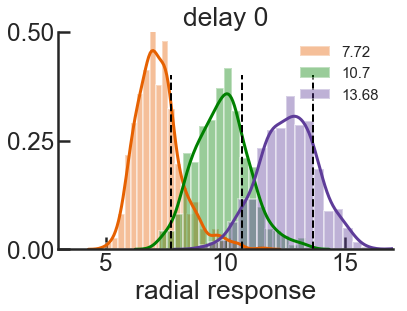

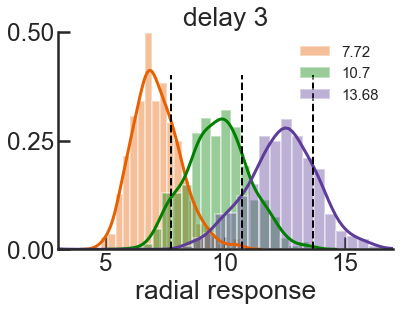

In [61]:

c_r1= '#e66101' 
c_r2='green'
c_r3= '#5e3c99' 

### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==0), 'r_R'], color=c_r1, label='7.72')
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==0), 'r_R'], color=c_r2, label='10.7')
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==0), 'r_R'], color=c_r3, label='13.68')
plt.title('delay 0')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0, 0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==3), 'r_R'], color=c_r1, label='7.72')
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==3), 'r_R'], color=c_r2, label='10.7')
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==3), 'r_R'], color=c_r3, label='13.68')
plt.title('delay 3')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0,0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


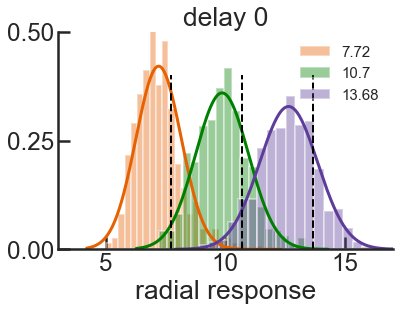

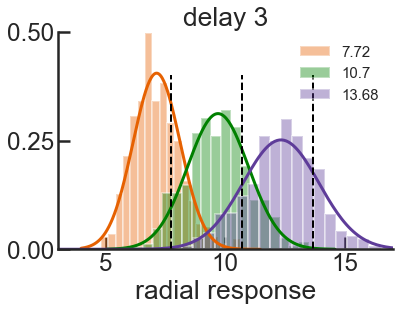

In [9]:
from scipy.stats import norm

c_r1= '#e66101' 
c_r2='green'
c_r3= '#5e3c99' 

### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==0), 'r_R'], color=c_r1, label='7.72', fit=norm, kde=False, fit_kws={"color":c_r1})
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==0), 'r_R'], color=c_r2, label='10.7', fit=norm, kde=False, fit_kws={"color":c_r2})
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==0), 'r_R'], color=c_r3, label='13.68', fit=norm, kde=False, fit_kws={"color":c_r3})
plt.title('delay 0')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0, 0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()


### Distribution A_Err in cw-ccw
sns.distplot(df_controls.loc[ (df_controls['r_T']==7.72) & (df_controls['delay']==3), 'r_R'], color=c_r1, label='7.72', fit=norm, kde=False, fit_kws={"color":c_r1})
sns.distplot(df_controls.loc[ (df_controls['r_T']==10.7) & (df_controls['delay']==3), 'r_R'], color=c_r2, label='10.7', fit=norm, kde=False, fit_kws={"color":c_r2})
sns.distplot(df_controls.loc[ (df_controls['r_T']==13.68) & (df_controls['delay']==3), 'r_R'], color=c_r3, label='13.68', fit=norm, kde=False, fit_kws={"color":c_r3})
plt.title('delay 3')
plt.legend(frameon=False, prop={'size': 15})
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel('radial response')

plt.plot([7.72, 7.72], [0, 0.4], 'k--', linewidth=2)
plt.plot([10.7, 10.7], [0, 0.4], 'k--', linewidth=2)
plt.plot([13.68, 13.68], [0, 0.4], 'k--', linewidth=2)
plt.xlim(3,17)
plt.ylim(0,0.5)
plt.yticks([0,0.25,0.5])
plt.gca().tick_params(direction='in')
plt.show()
